# 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
## 분석을 할 데이터를 불러와 봅시다.
data = pd.read_csv('data/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# Feature Selection

`상관계수`와 `공분산`을 바탕으로 피처를 선택하여 봅시다.

## 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야하는게 사실입니다. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는것이 중요합니다.

In [3]:
# 먼저, 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거합니다.
del data['chas']

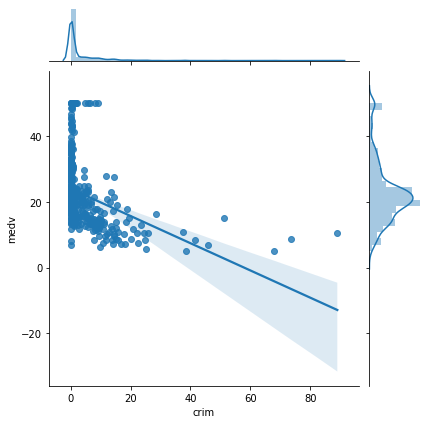

In [4]:
# 실제 집 값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴봅시다.
sns.jointplot(data=data,
             x= 'crim', 
             y = 'medv',
             kind='reg')

#### `x.cov(y)`

- 공분산을 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [5]:
# 실제 범죄율과 집 값의 공분산을 확인해봅시다.

data['crim'].cov(data['medv'])

-30.718507964458173

#### `x.corr(y)`

- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로상관계수를 계산하여 줍니다.

In [6]:
# 실제 상관계수가 몇인지도 확인해봅시다.

data['crim'].corr(data['medv'])

-0.38830460858681143

## 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

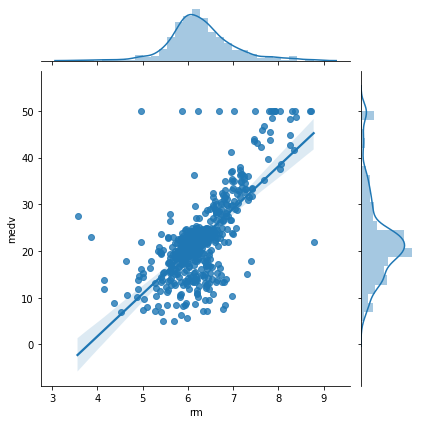

In [7]:
# 방의 개수가 늘어날수록 집 값도 늘어나지 않을까?
sns.jointplot(data= data, x='rm', y='medv', kind='regg')

In [8]:
# 실제 상관계수가 몇인지도 확인해봅시다.

data['rm'].corr(data['medv'])

0.695359947071539

In [9]:
# 위와 같이 공분산도 확인해봅시다.

data['rm'].cov(data['medv'])

4.493445879544474

#### `sns.heatmap(df, cmap, annot, fmt)`

- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

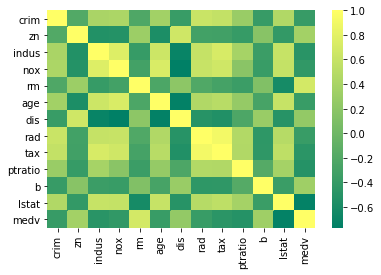

In [10]:
sns.heatmap(data.corr(),cmap='summer',annot=False,fmt="0.1f")

#### `plt.figure(figsize = (가로, 세로))`

- 도화지의 크기 설정

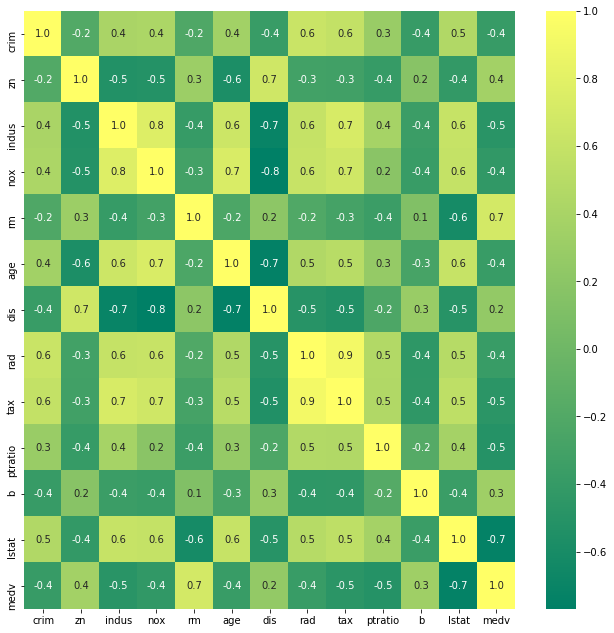

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(data.corr(), cmap='summer', annot=True, fmt='0.1f')

# Feature Extraction (특징 추출)

`PCA`를 이용하여 새로운 변수를 만들어보자.

In [12]:
# 변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것 인지 확인해봅시다.

corr_bar = []

for column in data.columns :
    print(f"{column}과 이름과 medv의 상과관계 :{data[column].corr(data['medv'])}")
    corr_bar.append(data[column].corr(data['medv']))

crim과 이름과 medv의 상과관계 :-0.38830460858681143
zn과 이름과 medv의 상과관계 :0.3604453424505435
indus과 이름과 medv의 상과관계 :-0.48372516002837357
nox과 이름과 medv의 상과관계 :-0.42732077237328264
rm과 이름과 medv의 상과관계 :0.695359947071539
age과 이름과 medv의 상과관계 :-0.37695456500459623
dis과 이름과 medv의 상과관계 :0.24992873408590394
rad과 이름과 medv의 상과관계 :-0.3816262306397775
tax과 이름과 medv의 상과관계 :-0.46853593356776685
ptratio과 이름과 medv의 상과관계 :-0.5077866855375616
b과 이름과 medv의 상과관계 :0.3334608196570666
lstat과 이름과 medv의 상과관계 :-0.7376627261740151
medv과 이름과 medv의 상과관계 :1.0


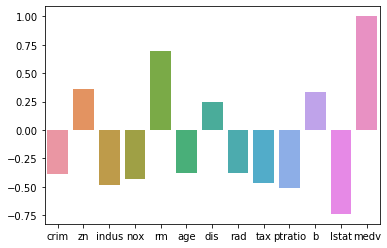

In [13]:
# 앞서 배운 barplot을 통하여 그래프를 그려봅시다.

sns.barplot(data.columns, corr_bar)

In [14]:
# 수치형데이터 중에 비교적 상관계수가 낮은 두개의 변수를 선택해봅시다.

x = data[['dis', 'b']]
x

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90
...,...,...
501,2.4786,391.99
502,2.2875,396.90
503,2.1675,396.90
504,2.3889,393.45


In [15]:
# PCA를 위한 라이브러리를 불러옵니다.

from sklearn.decomposition import PCA

#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [16]:
# 2개의 변수를 조합하여 1개의 변수를 만들어봅시다.

pca = PCA(n_components=1)

In [17]:
# 데이터를 학습시킵니다.

pca.fit(x)

PCA(n_components=1)

In [18]:
x.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


In [19]:
# 새로운 변수에 담긴 각 변수의 분산을 확인할 수 있습니다.

pca.components_

array([[-0.00672682, -0.99997737]])

In [20]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.

pca.explained_variance_ratio_

array([0.9995135])

In [21]:
# 새로운 변수를 pc1이라는 컬럼에 추가합시다.

data['pc1'] = pca.fit_transform(x)

In [22]:
data

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,-35.306314
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,-40.214917
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,-40.214110
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,-36.765677


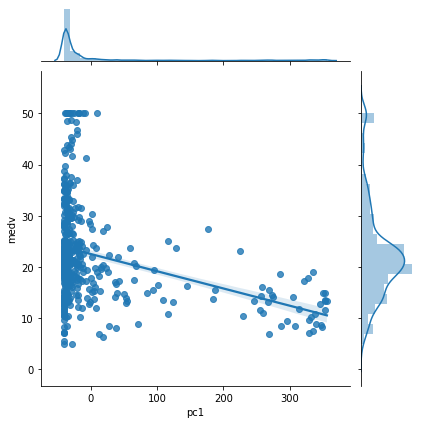

In [23]:
# 새로운 변수와 집 값의 상관관계를 확인해봅시다.
sns.jointplot(data=data, x= 'pc1', y = 'medv', kind= 'regg')

In [24]:
# 상관계수도 확인해봅시다.
data['pc1'].corr(data['medv'])

-0.3334845106741896

# 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아봅시다.

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [25]:
# 정규화에 필요한 라이브러리 입니다.

from sklearn.preprocessing import StandardScaler

In [26]:
# 정규화 객체를 만들어 줍니다.

scaler = StandardScaler()

In [27]:
scaler

StandardScaler()

In [28]:
# x를 학습시킨 후 변형하여 정규환된 x로 만들어 봅니다.

scaler.fit(x)
scaler_x = scaler.transform(x)

In [29]:
scaler.fit(x)

StandardScaler()

In [30]:
scaler_x

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

### 반복 작업

In [31]:
# PCA의 개수를 찾기
pca = PCA(n_components=1)

# 데이터를 학습
pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인할 수 있습니다.
pca.components_

array([[-0.70710678, -0.70710678]])

In [32]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.64575584])

In [33]:
# 위와 같이 pc1의 컬럼에 데이터를 넣어봅시다.
data['pc1'] = pca.fit_transform(scaler_x)

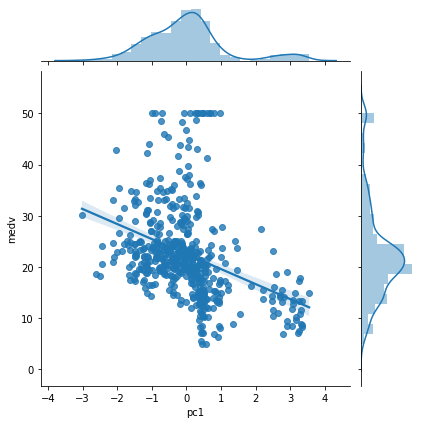

In [34]:
sns.jointplot(data=data , x = 'pc1', y='medv', kind='regg')

In [35]:
data['pc1'].corr(data['medv'])

-0.36298985100090203

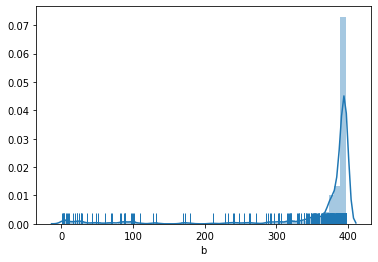

In [36]:
sns.distplot(x['b'], kde=True, rug=True)